Autor:
Manuel Eugenio Morocho Cayamcela, PhD

# Taller de afianzamiento 3: Clasificación de IRIS con k-vecinos más cercanos (kNN)

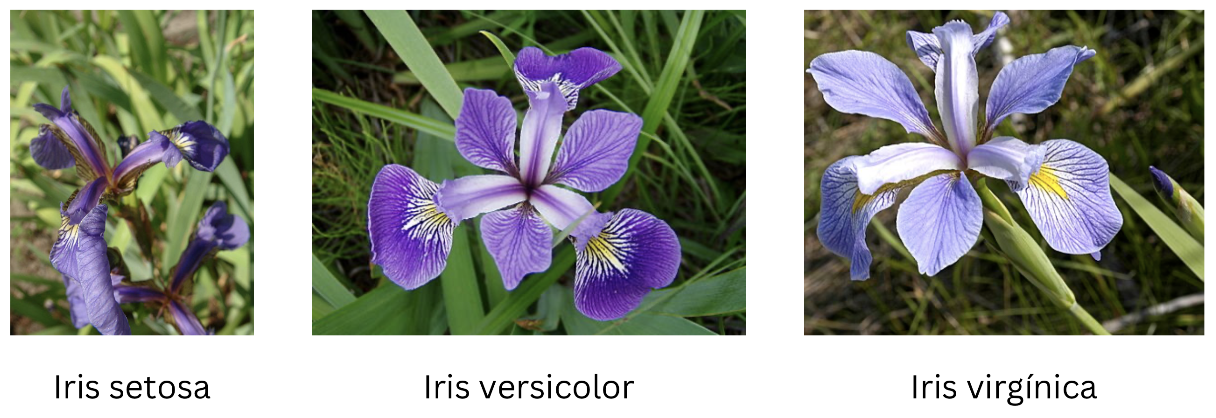

## Introducción

Este proyecto utiliza el algoritmo de aprendizaje supervisado k-vecinos más cercanos (kNN) para clasificar las flores IRIS en función de las medidas de sépalos y pétalos. Para este propósito se utiliza el dataset IRIS, un conocido conjunto de datos de referencia en el campo de la inteligencia artificial, que comprende 150 muestras de flores IRIS, cada una con cuatro características: longitud del sépalo, ancho del sépalo, longitud del pétalo y ancho del pétalo.

El conjunto de datos Iris es un conjunto de datos multivariante introducido por el estadístico y biólogo británico Ronald Fisher en su artículo de 1936 "The use of multiple measurements in taxonomic problems". Es a veces llamado el conjunto de datos de Anderson Iris porque Edgar Anderson recogió los datos para cuantificar la variación morfológica de las flores Iris de tres especies relacionadas.

El proyecto abarca varias etapas que incluyen recopilación y preparación de datos, análisis exploratorio de datos, preprocesamiento de datos, construcción de un modelo de clasificación utilizando el algoritmo kNN, evaluación del modelo, ajuste de hiperparámetros y visualización de límites de decisión.

Los objetivos principales de este proyecto son los siguientes:

- **Recopilación y preparación de datos:** Cargar el conjunto de datos de Iris y convertirlo en un DataFrame de pandas para su posterior análisis.

- **Exploración y visualización de datos:** Explorar la estructura del conjunto de datos, visualizar distribuciones y relaciones de características y verificar si faltan valores, duplicados o desequilibrios.

- **Preprocesamiento de datos:** Manejo de valores faltantes y duplicados, asegurando el equilibrio de datos.

- **División de datos de entrenamiento y prueba:** Dividir el conjunto de datos en conjuntos de entrenamiento y prueba para evaluar el rendimiento del modelo.

- **Construcción de modelos utilizando el algoritmo kNN:** Implementación del algoritmo kNN para construir un modelo de clasificación.

- **Evaluación del modelo:** Evaluación del rendimiento del modelo mediante precisión y matriz de confusión.

- **Ajuste de hiperparámetros:** Determinación del valor óptimo del parámetro 'k' para kNN variando el número de vecinos.

- **Visualización de límites de decisión:** Trazar límites de decisión para visualizar cómo el modelo separa diferentes clases.

A lo largo del proyecto, Python se emplea junto con bibliotecas populares como NumPy, Pandas, Matplotlib, Seaborn y scikit-learn. Este Notebook sirve como una guía completa y proporciona instrucciones paso a paso y fragmentos de código para implementar la clasificación kNN para el reconocimiento de especies de flores IRIS.

Se puede utilizar este proyecto como referencia o punto de partida para trabajos similares de clasificación de datos.

### Instalamos las librerías necesarias

Este bloque de código instala y actualiza las bibliotecas necesarias para el análisis de datos y la visualización en Python. Aquí está lo que hace cada línea:

`!pip install -U scikit-learn`: Instala y/o actualiza la biblioteca scikit-learn, que es una biblioteca de aprendizaje automático en Python. Proporciona una selección de algoritmos de aprendizaje supervisados y no supervisados.

`!pip install -U pandas`: Instala y/o actualiza la biblioteca pandas, que proporciona estructuras de datos y funciones de análisis de datos de alto rendimiento y fáciles de usar.

`!pip install -U matplotlib`: Instala y/o actualiza la biblioteca matplotlib, que es una biblioteca de trazado en 2D en Python que produce figuras de calidad de publicación en una variedad de formatos impresos y entornos interactivos.

`!pip install -U seaborn`: Instala y/o actualiza la biblioteca seaborn, que es una biblioteca de visualización de datos en Python basada en matplotlib. Proporciona una interfaz de alto nivel para dibujar gráficos estadísticos atractivos e informativos.

El prefijo `!` permite ejecutar comandos de shell desde el notebook de Jupyter, y el argumento `-U` le dice a pip que actualice el paquete si ya está instalado.

In [ ]:
!pip install -U scikit-learn
!pip install -U pandas
!pip install -U matplotlib
!pip install -U seaborn

### Cargamos el dataset IRIS

Este fragmento de código en Python está utilizando la biblioteca scikit-learn para cargar el conjunto de datos Iris.

La línea `from sklearn.datasets import load_iris` importa la función `load_iris` del módulo `datasets` de la biblioteca scikit-learn. Esta función se utiliza para cargar el conjunto de datos Iris.

La línea `iris = load_iris()` llama a la función `load_iris` y guarda el resultado en la variable `iris`. El resultado es un objeto tipo Bunch, que es un contenedor que expone las claves como atributos. Este objeto contiene el conjunto de datos Iris y sus atributos.

In [4]:
# importamos la función load_iris desde el módulo de conjuntos de datos
from sklearn.datasets import load_iris

# guardamos el objeto que contiene el conjunto de datos de iris y sus atributos
iris = load_iris()

### Exploratory data analysis

In [6]:
print(iris)

{'data': array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
     

In [7]:
# Print iris data shape
print('The shape of the iris data is:', iris.data.shape)
# Print iris target shape
print('The shape of the iris targets is:', iris.target.shape)
# Print iris classes shape
print('The shape of the iris classes set is:', iris.target_names.shape)

The shape of the iris data is: (150, 4)
The shape of the iris targets is: (150,)
The shape of the iris classes set is: (3,)


In [10]:
# Convert scikit-learn "bunch" object to a pandas dataframe
import pandas as pd
import numpy as np

df= pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                 columns= iris['feature_names'] + ['target'])

df['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,species
0,5.1,3.5,1.4,0.2,0.0,setosa
1,4.9,3.0,1.4,0.2,0.0,setosa
2,4.7,3.2,1.3,0.2,0.0,setosa
3,4.6,3.1,1.5,0.2,0.0,setosa
4,5.0,3.6,1.4,0.2,0.0,setosa


Now, let’s also check the columns and their data types. For this, we will use the info() method.

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   sepal length (cm)  150 non-null    float64 
 1   sepal width (cm)   150 non-null    float64 
 2   petal length (cm)  150 non-null    float64 
 3   petal width (cm)   150 non-null    float64 
 4   target             150 non-null    float64 
 5   species            150 non-null    category
dtypes: category(1), float64(5)
memory usage: 6.3 KB


Let’s get a quick statistical summary of the dataset using the describe() method. The describe() function applies basic statistical computations on the dataset like extreme values, count of data points standard deviation, etc. Any missing value or NaN value is automatically skipped. describe() function gives a good picture of the distribution of data.

In [12]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


### Data preprocessing

#### Missing values

We will check if our data contains any missing values or not. Missing values can occur when no information is provided for one or more items or for a whole unit. We will use the isnull() method.

In [13]:
df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
species              0
dtype: int64

We can see that no column as any missing value.

#### Duplicates

Let’s see if our dataset contains any duplicates or not.

In [14]:
duplicates = df[df.duplicated()]
print("Number of duplicates:", len(duplicates))

Number of duplicates: 1


Pandas drop_duplicates() method helps in removing duplicates from the data frame.

In [15]:
# Drop duplicates
data = df.drop_duplicates()

In [16]:
data = df.drop_duplicates(subset ="species",)
data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,species
0,5.1,3.5,1.4,0.2,0.0,setosa
50,7.0,3.2,4.7,1.4,1.0,versicolor
100,6.3,3.3,6.0,2.5,2.0,virginica


Let’s see if the dataset is balanced or not i.e. all the species contain equal amounts of rows or not. We will use the Series.value_counts() function. This function returns a Series containing counts of unique values. 

In [17]:
df.value_counts("species")

species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

### Data Visualization

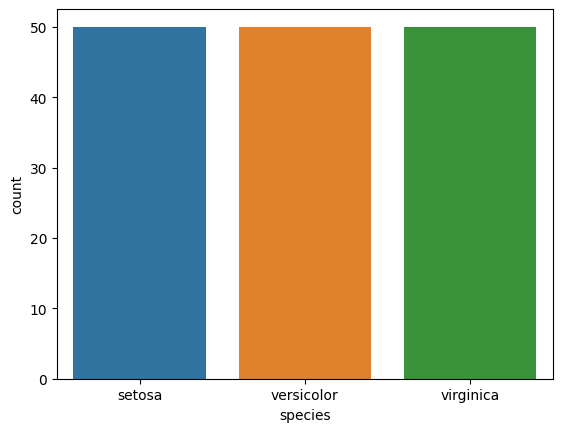

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt
 
sns.countplot(x='species', data=df, hue='species')
plt.show()

Relation between variables

We will see the relationship between the sepal length and sepal width and also between petal length and petal width.

Example 1: Comparing Sepal Length and Sepal Width

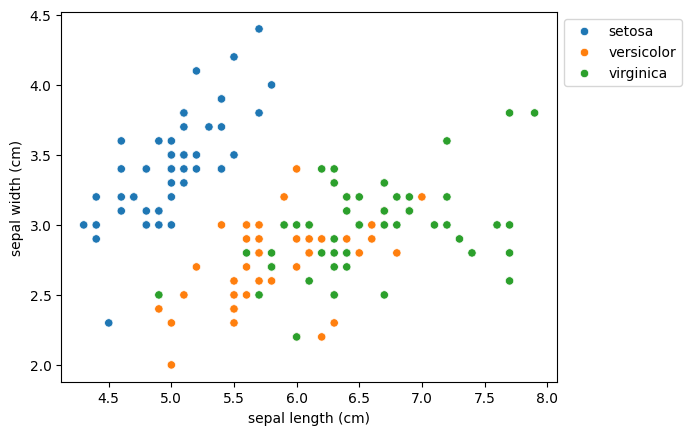

In [19]:
sns.scatterplot(x='sepal length (cm)', y='sepal width (cm)',
                hue='species', data=df, )
 
# Placing Legend outside the Figure
plt.legend(bbox_to_anchor=(1, 1), loc=2)
 
plt.show()

From the above plot, we can infer that:

* Species Setosa has smaller sepal lengths but larger sepal widths.
* Versicolor Species lies in the middle of the other two species in terms of sepal length and width
* Species Virginica has larger sepal lengths but smaller sepal widths.

Example 2: Comparing Petal Length and Petal Width

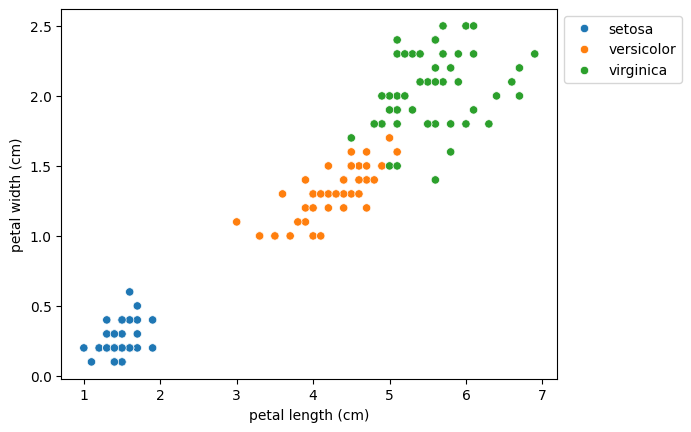

In [20]:
sns.scatterplot(x='petal length (cm)', y='petal width (cm)',
                hue='species', data=df, )
 
# Placing Legend outside the Figure
plt.legend(bbox_to_anchor=(1, 1), loc=2)
 
plt.show()

From the above plot, we can infer that:

* Species Setosa has smaller petal lengths and widths.
* Versicolor Species lies in the middle of the other two species in terms of petal length and width
* Species Virginica has the largest of petal lengths and widths.

Let’s plot all the column’s relationships using a pairplot. It can be used for multivariate analysis.

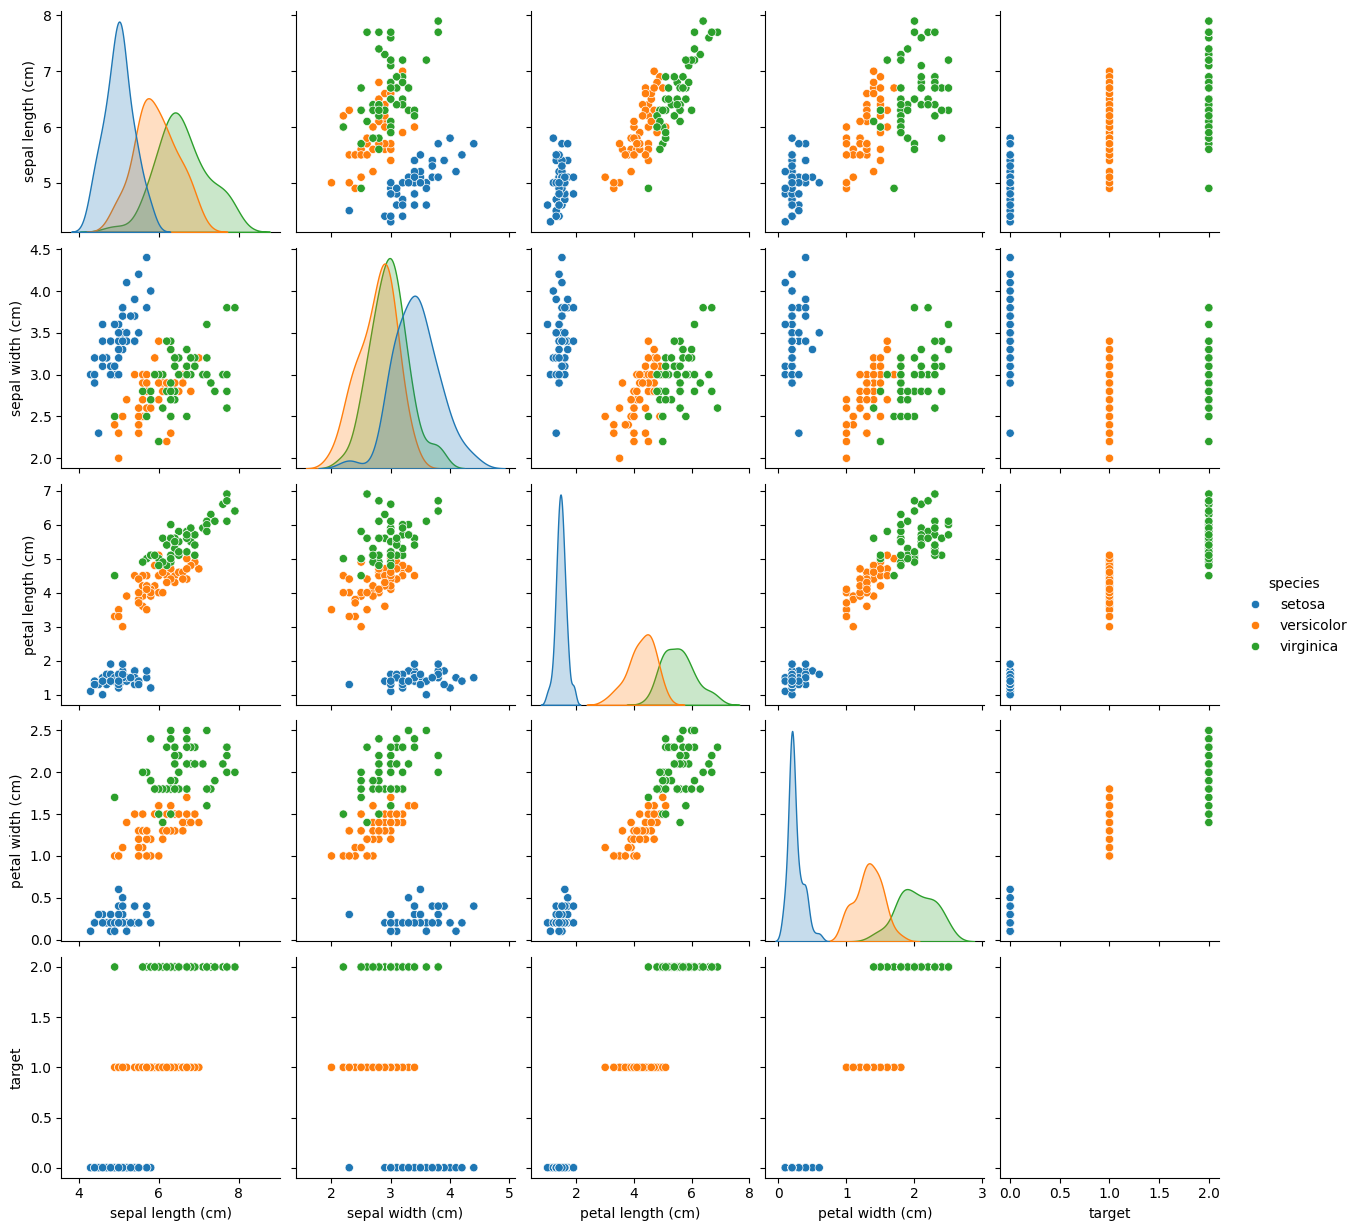

In [21]:
#sns.pairplot(df.drop(['Id'], axis = 1), 
#             hue='Species', height=2)
sns.pairplot(df, hue="species")

We can see many types of relationships from this plot such as the species Setosa has the smallest of petals widths and lengths. It also has the smallest sepal length but larger sepal widths. Such information can be gathered about any other species.

### Splitting data for training and testing

In [22]:
X = df.drop(["target", "species"], axis=1)
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [23]:
y = df["species"] #double square brackets to keep selected data in DataFrame
y.head()

0    setosa
1    setosa
2    setosa
3    setosa
4    setosa
Name: species, dtype: category
Categories (3, object): ['setosa', 'versicolor', 'virginica']

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=0)

### Fit/train the classifier

In [25]:
from sklearn.neighbors import KNeighborsClassifier

classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)

KNeighborsClassifier()

### Make predictions on our new trained model

In [26]:
y_pred = classifier.predict(X_test)
y_pred

array(['setosa', 'setosa', 'setosa', 'setosa', 'versicolor', 'versicolor',
       'versicolor', 'setosa', 'versicolor', 'virginica', 'virginica',
       'virginica', 'versicolor', 'virginica', 'versicolor', 'setosa',
       'setosa', 'virginica', 'setosa', 'versicolor', 'virginica',
       'versicolor', 'versicolor', 'setosa', 'virginica', 'setosa',
       'setosa', 'versicolor', 'virginica', 'versicolor', 'setosa',
       'versicolor', 'virginica', 'virginica', 'setosa', 'versicolor',
       'virginica', 'virginica'], dtype=object)

### Computing performance metrics

#### Accuracy

In [27]:
from sklearn.metrics import accuracy_score

acc = accuracy_score(y_test, y_pred)
print("Accuracy:", acc)

Accuracy: 1.0


### Confusion matrix

[[13  0  0]
 [ 0 13  0]
 [ 0  0 12]]


<Axes: >

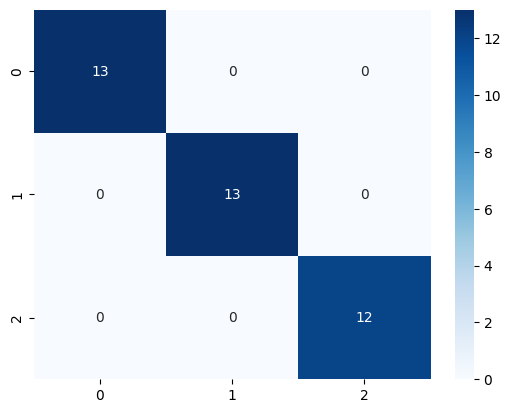

In [28]:
from sklearn.metrics import confusion_matrix

cf_matrix = confusion_matrix(y_test, y_pred)
print(cf_matrix)
sns.heatmap(cf_matrix, annot=True, cmap='Blues')

### Setting the appropiate value of 'k'

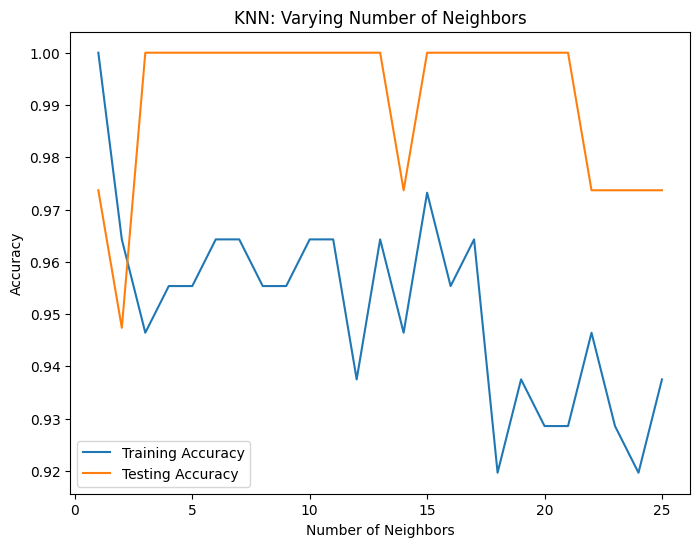

In [29]:
train_accuracies = {}
test_accuracies = {}
neighbors = np.arange(1, 26)
for neighbor in neighbors:
    knn = KNeighborsClassifier(n_neighbors=neighbor)
    knn.fit(X_train, y_train)
    train_accuracies[neighbor] = knn.score(X_train, y_train)
    test_accuracies[neighbor] = knn.score(X_test, y_test)

plt.figure(figsize=(8, 6))
plt.title("KNN: Varying Number of Neighbors")
plt.plot(neighbors, train_accuracies.values(), label="Training Accuracy")
plt.plot(neighbors, test_accuracies.values(), label="Testing Accuracy")
plt.legend()
plt.xlabel("Number of Neighbors")
plt.ylabel("Accuracy")
plt.show()

### Ploting decision boundaries

We train such a classifier on the iris dataset and observe the difference of the decision boundary obtained with regards to the parameter weights. 

Required reading:

- [KNeighborsClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)<br>
- [Nearest Neighbors Classification](https://scikit-learn.org/stable/auto_examples/neighbors/plot_classification.html)<br>
- [Importance of Feature Scaling](https://scikit-learn.org/stable/auto_examples/preprocessing/plot_scaling_importance.html#sphx-glr-auto-examples-preprocessing-plot-scaling-importance-py)

In [32]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

iris_2 = load_iris(as_frame=True)
X_2 = iris_2.data[["sepal length (cm)", "sepal width (cm)"]]
y_2 = iris_2.target
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_2, y_2, stratify=y, random_state=0)

In [33]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

clf = Pipeline(
    steps=[("scaler", StandardScaler()), ("knn", KNeighborsClassifier(n_neighbors=11))]
)

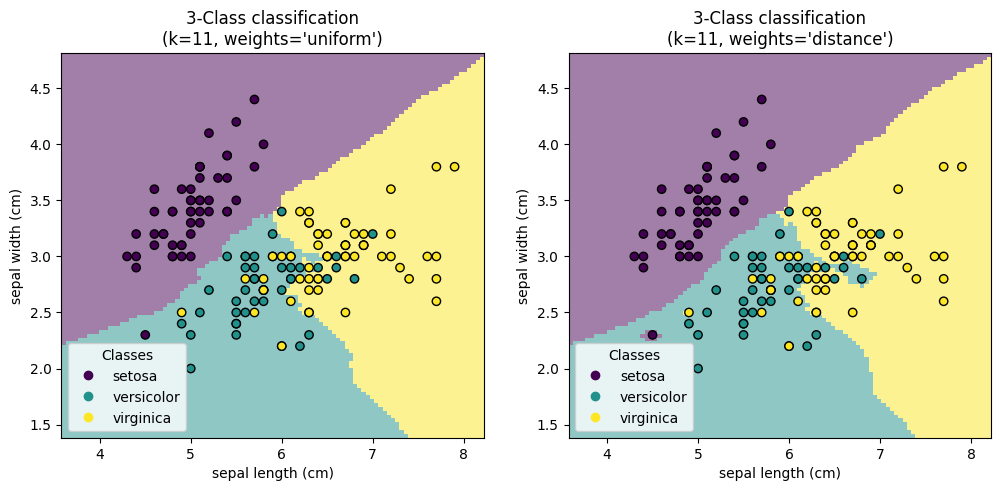

In [34]:
import matplotlib.pyplot as plt

from sklearn.inspection import DecisionBoundaryDisplay

_, axs = plt.subplots(ncols=2, figsize=(12, 5))

for ax, weights in zip(axs, ("uniform", "distance")):
    clf.set_params(knn__weights=weights).fit(X_train_2, y_train_2)
    disp = DecisionBoundaryDisplay.from_estimator(
        clf,
        X_test_2,
        response_method="predict",
        plot_method="pcolormesh",
        xlabel=iris.feature_names[0],
        ylabel=iris.feature_names[1],
        shading="auto",
        alpha=0.5,
        ax=ax,
    )
    scatter = disp.ax_.scatter(X_2.iloc[:, 0], X_2.iloc[:, 1], c=y_2, edgecolors="k")
    disp.ax_.legend(
        scatter.legend_elements()[0],
        iris.target_names,
        loc="lower left",
        title="Classes",
    )
    _ = disp.ax_.set_title(
        f"3-Class classification\n(k={clf[-1].n_neighbors}, weights={weights!r})"
    )

plt.show()